In [9]:
import pandas as pd
df = pd.read_csv('C:/Users/corts033/Documents/Personal/Geo Tech/MGT 6203/Project/cleaned_features.csv',index_col=None)
df.columns
df.head()

,outcome,round,time,L_f1,W_f1,fights_f1,L_f2,W_f2,fights_f2,height_x,...,weightclass_wbw,weightclass_wflw,weightclass_wsw,weightclass_ww,stance_x_Orthodox,stance_x_Southpaw,stance_x_Switch,stance_y_Orthodox,stance_y_Southpaw,stance_y_Switch
0,0,5,300,1,4,5,2,3,5,74,...,0,0,0,0,1,0,0,1,0,0
1,1,5,300,1,5,6,2,3,5,73,...,0,0,0,0,1,0,0,1,0,0
2,0,2,292,2,3,5,2,3,5,74,...,0,0,0,0,1,0,0,1,0,0
3,1,3,300,4,3,7,2,3,5,72,...,0,0,0,0,1,0,0,1,0,0
4,0,3,300,1,0,1,2,3,5,73,...,0,0,0,0,0,1,0,1,0,0


In [10]:
#Creates y and X variables
y= df['outcome'] #Outcome = 1 means figher 1 won, Outcome = 2 means fighter 2 won
X = df.loc[:, df.columns != 'outcome']


,round,time,L_f1,W_f1,fights_f1,L_f2,W_f2,fights_f2,height_x,reach_x,...,weightclass_wbw,weightclass_wflw,weightclass_wsw,weightclass_ww,stance_x_Orthodox,stance_x_Southpaw,stance_x_Switch,stance_y_Orthodox,stance_y_Southpaw,stance_y_Switch
0,5,300,1,4,5,2,3,5,74,76,...,0,0,0,0,1,0,0,1,0,0
1,5,300,1,5,6,2,3,5,73,76,...,0,0,0,0,1,0,0,1,0,0
2,2,292,2,3,5,2,3,5,74,74,...,0,0,0,0,1,0,0,1,0,0
3,3,300,4,3,7,2,3,5,72,77,...,0,0,0,0,1,0,0,1,0,0
4,3,300,1,0,1,2,3,5,73,75,...,0,0,0,0,0,1,0,1,0,0


In [19]:
# split X and y into training and testing sets , tutorial = https://www.datacamp.com/tutorial/understanding-logistic-regression-python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [27]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs', max_iter=2000)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

#Summary of model
logreg.coef_

array([[-1.06975785e-02,  7.78164697e-04, -4.63685998e-01,
         4.44994237e-01, -1.86917611e-02,  5.42777333e-01,
        -5.98920514e-01, -5.61431803e-02,  5.44114484e-04,
         1.15047871e-02, -2.57597121e-02,  1.41949548e-02,
         4.95810900e-03, -1.44579090e-01,  1.41762262e-01,
         2.33181491e-01,  1.48046913e-01,  4.08330942e-01,
         2.60178621e-01,  6.15345038e-02,  2.00485750e-02,
         1.83927172e-01, -4.93497158e-04, -7.89412181e-03,
         4.27666179e-02,  1.53521402e-02, -1.03395904e-01,
        -1.06420559e-01]])

In [29]:
import statsmodels.api as sm

#Log regression similar to glm in R
log_reg = sm.Logit(y_train, X_train).fit(maxiter=2000) 

# printing the summary table 
print(log_reg.summary()) 

Optimization terminated successfully.
         Current function value: 0.459046
         Iterations 1144
                           Logit Regression Results                           
Dep. Variable:                outcome   No. Observations:                 3483
Model:                          Logit   Df Residuals:                     3457
Method:                           MLE   Df Model:                           25
Date:                Sun, 17 Mar 2024   Pseudo R-squ.:                  0.3282
Time:                        18:33:10   Log-Likelihood:                -1598.9
converged:                       True   LL-Null:                       -2379.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
round                -0.0064      0.057     -0.111      0.912      -0.119       0.106
time 

In [22]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[474, 161],
       [149, 710]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

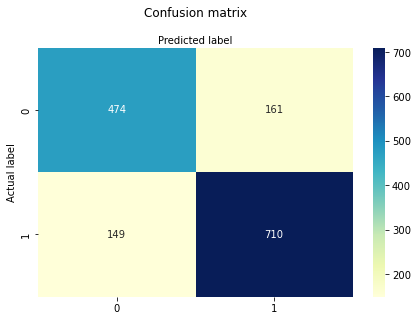

In [30]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Text(0.5,257.44,'Predicted label');